# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sw
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('glassdoor_jobs.csv')
data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [3]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [4]:
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [5]:
data.head(2)

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [6]:
data.drop('unnamed:_0', axis = 1, inplace = True)

# Data Cleaning

In [7]:
len(data.salary_estimate[data.salary_estimate == '-1'])

214

In [8]:
data = data[data.salary_estimate != '-1']
print(data.shape)

(742, 14)


In [9]:
data.salary_estimate = data.salary_estimate.apply(lambda x : x.split('(')[0])
data.salary_estimate = data.salary_estimate.apply(lambda x : x.replace('K', '').replace('$',''))
data.salary_estimate.head()

0     53-91 
1    63-112 
2     80-90 
3     56-97 
4    86-143 
Name: salary_estimate, dtype: object

In [10]:
data['hourly'] = data.salary_estimate.apply(lambda x: 1 if 'per hour' in x.lower() else 0)
data['employee_provided'] = data.salary_estimate.apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)
data.salary_estimate = data.salary_estimate.apply(lambda x : x.lower().replace('per hour', '').replace('employer provided salary:',''))

In [11]:
data['min_salary'] = data.salary_estimate.apply(lambda x : x.split('-')[0])
data['max_salary'] = data.salary_estimate.apply(lambda x : x.split('-')[1])

In [12]:
data['company_name'].head(5)

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: company_name, dtype: object

In [13]:
data['company_text'] = data.apply(lambda x : x['company_name'] if x['rating'] <1 else x['company_name'][:-3], axis = 1)
data.company_text = data.company_text.apply(lambda x : x.replace('\n',''))
data.company_text.head(5)

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
Name: company_text, dtype: object

In [14]:
data['job_state'] = data.location.apply(lambda x : x.split(',')[1])
data.job_state = data.job_state.apply(lambda x : x.replace('Los Angeles', 'CA'))

In [15]:
data['same_state'] = data.apply(lambda x : 1 if x.location == x.headquarters else 0, axis = 1)

In [16]:
data['company_age'] = data.founded.apply(lambda x : x if x < 0 else 2020-x)

In [17]:
data['python'] = data.job_description.apply(lambda x : 1 if 'python' in x.lower() else 0)
data['tableau'] = data.job_description.apply(lambda x : 1 if 'tableau' in x.lower() else 0)
data['aws'] = data.job_description.apply(lambda x : 1 if 'aws' in x.lower() else 0)
data['spark'] = data.job_description.apply(lambda x : 1 if 'spark' in x.lower() else 0)
data['sql'] = data.job_description.apply(lambda x : 1 if 'sql' in x.lower() else 0)
data['power_bi'] = data.job_description.apply(lambda x : 1 if 'power bi' in x.lower() else 0)
data['excel'] = data.job_description.apply(lambda x : 1 if 'excel' in x.lower() else 0)
data['machine_learning'] = data.job_description.apply(lambda x : 1 if 'machine learning' in x.lower() else 0)

In [18]:
data['size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: size, dtype: int64

In [19]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [20]:
data['job_simplified'] = data.job_title.apply(title_simplifier)
data.job_simplified.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simplified, dtype: int64

In [21]:
data['seniority_level'] = data.job_title.apply(seniority)
data.seniority_level.value_counts()

na        520
senior    220
jr          2
Name: seniority_level, dtype: int64

In [22]:
data['len_job_description'] = data.job_description.apply(lambda x : len(x))

In [23]:
data['num_competitors'] = data.competitors.apply(lambda x : len(x.split(',')) if x != '-1' else 0)

In [24]:
data[data['hourly'] == 1][['min_salary', 'max_salary']].head(10)

,min_salary,max_salary
197,17,24
209,21,34
240,18,25
247,21,34
257,15,25
307,17,24
337,21,34
427,18,25
437,24,39
456,21,34


In [25]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors'],
      dtype='object')

In [26]:
len(list(data.columns))

34

In [27]:
data.max_salary = data.max_salary.astype('int64')
data.min_salary = data.min_salary.astype('int64')
data['min_salary'] = data.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
data['max_salary'] = data.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [28]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors'],
      dtype='object')

In [29]:
len(list(data.columns))

34

In [30]:
data[data['hourly'] == 1][['min_salary', 'max_salary']].head(10)

,min_salary,max_salary
197,34,48
209,42,68
240,36,50
247,42,68
257,30,50
307,34,48
337,42,68
427,36,50
437,48,78
456,42,68


In [31]:
data['avg_salary'] = (data.min_salary + data.max_salary)/2

In [32]:
data[data['hourly'] == 1][['min_salary', 'max_salary', 'avg_salary']].head()

,min_salary,max_salary,avg_salary
197,34,48,41.0
209,42,68,55.0
240,36,50,43.0
247,42,68,55.0
257,30,50,40.0


In [33]:
data['size'].apply(lambda x : x.replace('Unknown', '0 employess').replace('-1', '0 employess')[:-9].replace('+','').split('to')[0])

0        501 
1      10000 
2        501 
3       1001 
4         51 
5        201 
6        501 
7        201 
8      10000 
9         51 
10       501 
11      5001 
12     10000 
13       201 
14     10000 
15      1001 
16        51 
17       201 
18        51 
19       501 
20       201 
21       201 
22       501 
23        51 
25       501 
26     10000 
27      1001 
28      5001 
29     10000 
30       501 
31      1001 
32      1001 
33     10000 
34      5001 
35       201 
36       201 
37      1001 
38       201 
39      5001 
40       201 
41       201 
43         1 
44        51 
45      5001 
46      1001 
48         0 
49     10000 
50      5001 
51       501 
52     10000 
54       501 
55     10000 
56      1001 
57     10000 
58     10000 
59      5001 
60       501 
61        51 
62       501 
63       201 
65       201 
66       201 
67       501 
68      1001 
70     10000 
72        51 
73        51 
75       201 
76         1 
77     10000 
78         1 
79    

In [34]:
data.revenue.value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: revenue, dtype: int64

In [35]:
data.to_csv('glassdoor_datascientist.csv')

# Exploratory Data Analysis

In [36]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary'],
      dtype='object')

In [37]:
data.dtypes

job_title               object
salary_estimate         object
job_description         object
rating                 float64
company_name            object
location                object
headquarters            object
size                    object
founded                  int64
type_of_ownership       object
industry                object
sector                  object
revenue                 object
competitors             object
hourly                   int64
employee_provided        int64
min_salary               int64
max_salary               int64
company_text            object
job_state               object
same_state               int64
company_age              int64
python                   int64
tableau                  int64
aws                      int64
spark                    int64
sql                      int64
power_bi                 int64
excel                    int64
machine_learning         int64
job_simplified          object
seniority_level         object
len_job_

In [38]:
data.describe()

,rating,founded,hourly,employee_provided,min_salary,max_salary,same_state,company_age,python,tableau,aws,spark,sql,power_bi,excel,machine_learning,len_job_description,num_competitors,avg_salary
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,0.557951,46.591644,0.528302,0.199461,0.237197,0.225067,0.512129,0.045822,0.522911,0.424528,3869.545822,1.053908,101.434636
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,0.496965,53.778815,0.499535,0.399865,0.425651,0.417908,0.500190,0.209240,0.499812,0.494605,1521.495868,1.384239,37.546122
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,15.500000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,73.500000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3731.000000,0.000000,97.500000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4740.000000,3.000000,122.500000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,254.000000


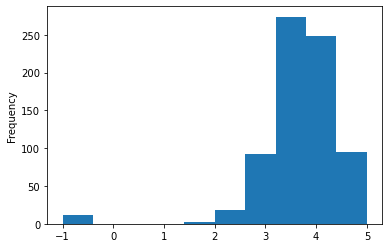

In [39]:
data['rating'].plot(kind = 'hist');

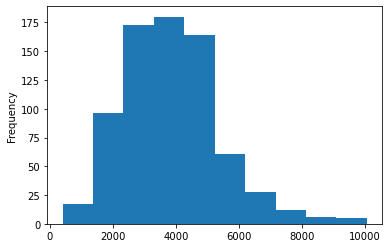

In [40]:
data['len_job_description'].plot(kind = 'hist');

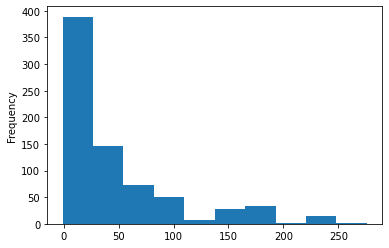

In [41]:
data['company_age'].plot(kind = 'hist');

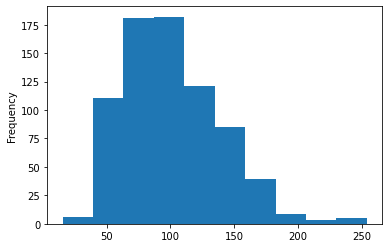

In [42]:
data['avg_salary'].plot(kind = 'hist');

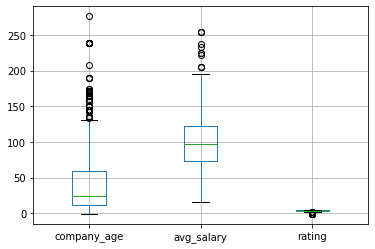

In [43]:
data.boxplot(column = ['company_age', 'avg_salary', 'rating' ]);

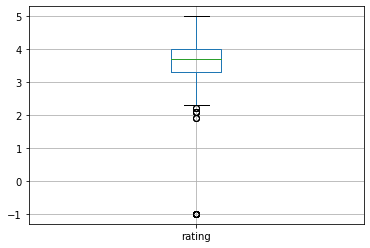

In [44]:
data.boxplot(column = 'rating');

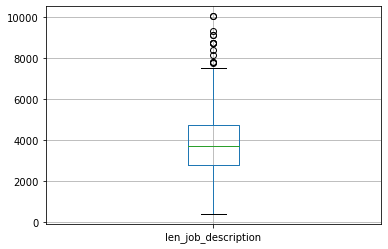

In [45]:
data.boxplot('len_job_description');

In [46]:
data1 = data[['company_age', 'min_salary', 'avg_salary', 'max_salary' ,'rating', 'len_job_description']]

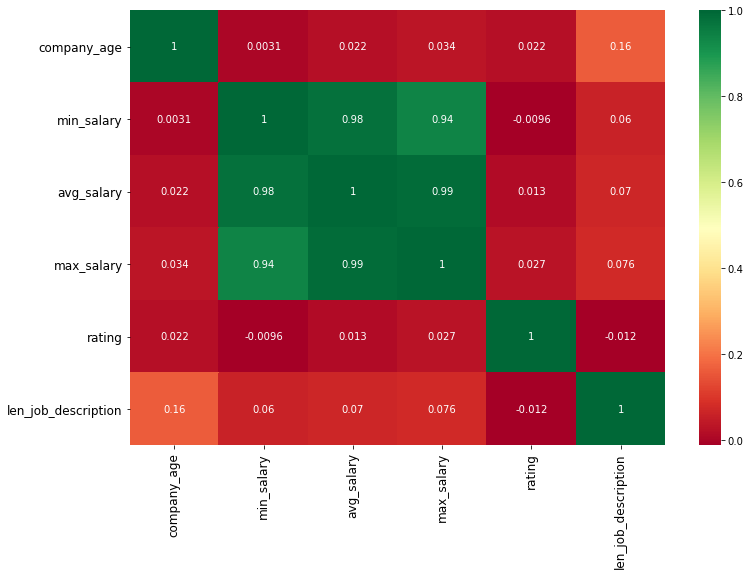

In [47]:
corrmat=data1.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(12,8)) 
g=sns.heatmap(data1.corr(),annot=True,cmap="RdYlGn")
plt.xticks(rotation = 90, fontsize = 12);
plt.yticks(rotation = 0, fontsize = 12);

In [48]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary'],
      dtype='object')

In [49]:
categorical_features = data[['job_simplified', 'location', 'headquarters', 'same_state' ,'type_of_ownership', 'industry', 
                             'sector', 'company_text', 'job_state', 'python', 'tableau', 'aws', 'spark', 'sql', 'power_bi', 
                             'excel' , 'seniority_level']]
categorical_features.head()

,job_simplified,location,headquarters,same_state,type_of_ownership,industry,sector,company_text,job_state,python,tableau,aws,spark,sql,power_bi,excel,seniority_level
0,data scientist,"Albuquerque, NM","Goleta, CA",0,Company - Private,Aerospace & Defense,Aerospace & Defense,Tecolote Research,NM,1,1,0,0,0,1,1,na
1,data scientist,"Linthicum, MD","Baltimore, MD",0,Other Organization,Health Care Services & Hospitals,Health Care,University of Maryland Medical System,MD,1,0,0,0,0,0,0,na
2,data scientist,"Clearwater, FL","Clearwater, FL",1,Company - Private,Security Services,Business Services,KnowBe4,FL,1,0,0,1,1,0,1,na
3,data scientist,"Richland, WA","Richland, WA",1,Government,Energy,"Oil, Gas, Energy & Utilities",PNNL,WA,1,0,0,0,0,0,0,na
4,data scientist,"New York, NY","New York, NY",1,Company - Private,Advertising & Marketing,Business Services,Affinity Solutions,NY,1,0,0,0,1,0,1,na


graph for job_simplified: total = 7


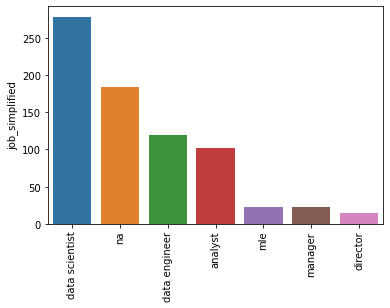

graph for location: total = 200


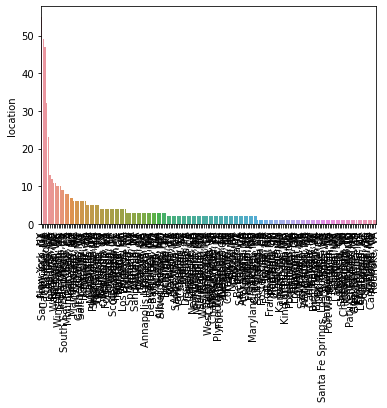

graph for headquarters: total = 198


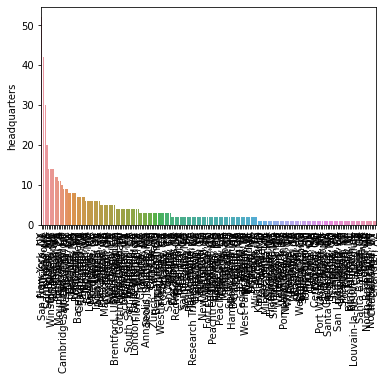

graph for same_state: total = 2


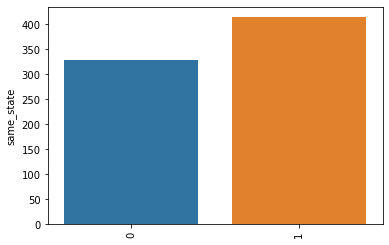

graph for type_of_ownership: total = 11


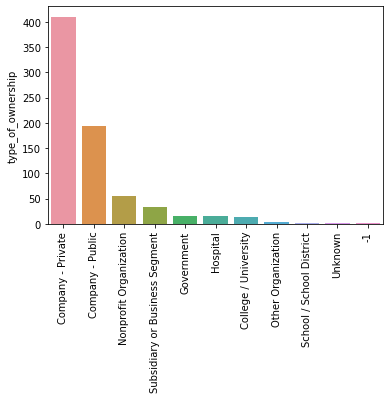

graph for industry: total = 60


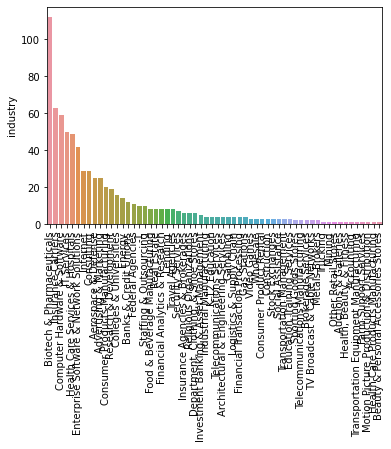

graph for sector: total = 25


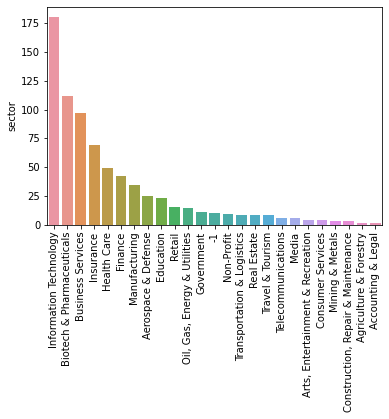

graph for company_text: total = 343


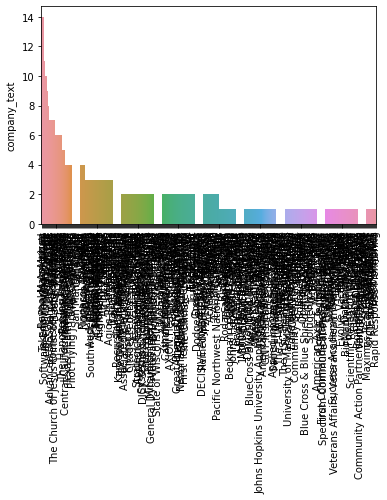

graph for job_state: total = 37


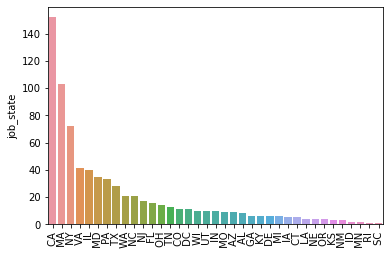

graph for python: total = 2


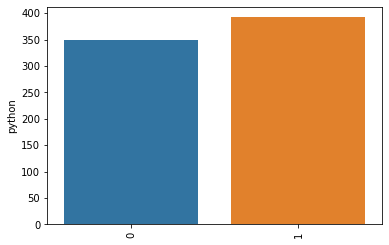

graph for tableau: total = 2


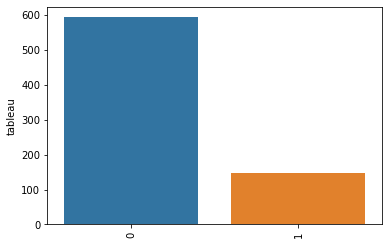

graph for aws: total = 2


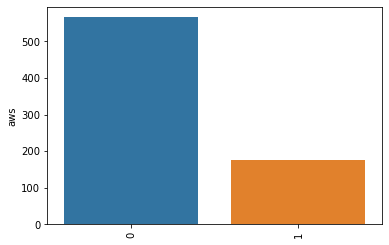

graph for spark: total = 2


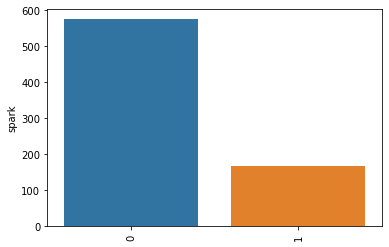

graph for sql: total = 2


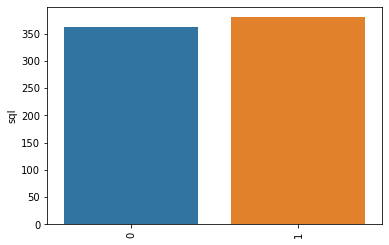

graph for power_bi: total = 2


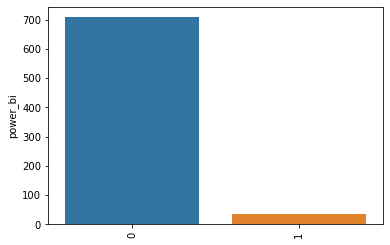

graph for excel: total = 2


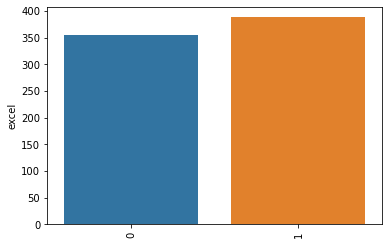

graph for seniority_level: total = 3


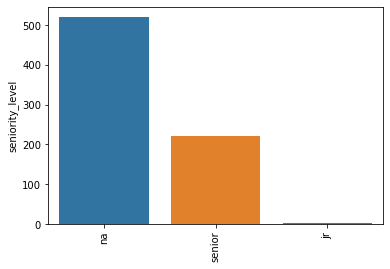

In [50]:
for i in categorical_features.columns:
    cat_num = categorical_features[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for industry: total = 20


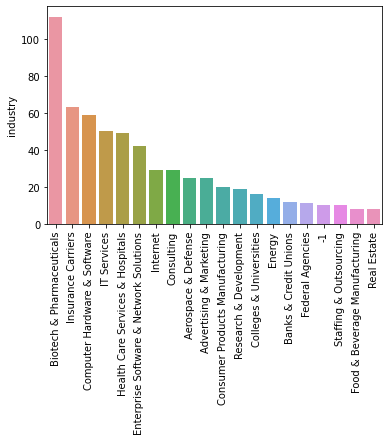

graph for location: total = 20


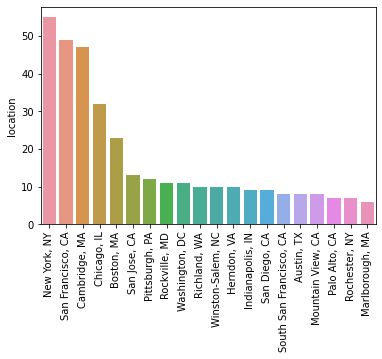

graph for headquarters: total = 20


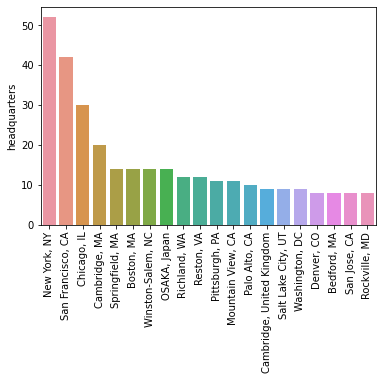

graph for company_text: total = 20


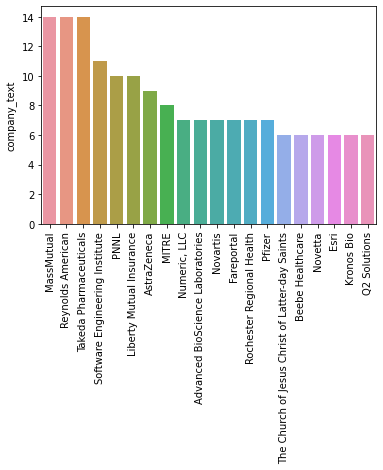

In [51]:
for i in categorical_features[['industry', 'location', 'headquarters','company_text']].columns:
    cat_num = categorical_features[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [52]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary'],
      dtype='object')

In [53]:
pd.pivot_table(data, index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,66.122549
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,87.967391


In [54]:
pd.pivot_table(data, index = ['job_simplified','seniority_level'], values = 'avg_salary')

avg_salary
job_simplified seniority_level            
analyst        jr                56.500000
               na                61.155405
               senior            80.092593
data engineer  na                96.701220
               senior           124.689189
data scientist jr               106.500000
               na               107.043011
               senior           138.956522
director       na               168.607143
manager        na                84.022727
mle            na               119.133333
               senior           142.071429
na             na                78.500000
               senior           109.061404

In [55]:
pd.pivot_table(data, index = 'job_state', values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)[:10]

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


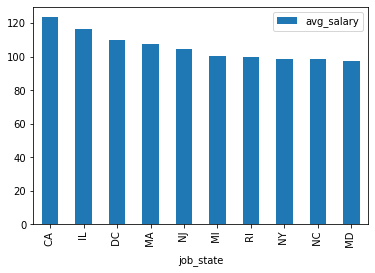

In [56]:
pd.pivot_table(data, index = 'job_state', values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)[:10].plot(kind = 'bar');

In [57]:
pd.pivot_table(data, index = ['job_state', 'job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values(by = 'job_state', ascending = False)

avg_salary
job_state job_simplified            
 WI       na                       4
          data scientist           3
          analyst                  3
 WA       na                       1
          data scientist          17
          analyst                  3
 VA       na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
 UT       data engineer            3
          analyst                  4
          data scientist           3
 TX       na                       7
          data scientist          13
          data engineer            8
 TN       data scientist           1
          data engineer           10
          analyst                  2
 SC       na                       1
 RI       analyst                  1
 PA       manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
 OR       data scientist           3
          data engineer            1
 OH       na                       3
          data scientist           7
          analyst                  4
 NY       na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
 NM       data scientist           3
 NJ       data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
 NE       na                       4
 NC       na                      12
          data scientist           3
          data engineer            6
 MO       na                       3
          manager                  1
          data scientist           3
          analyst                  2
 MN       data engineer            1
          analyst                  1
 MI       manager                  2
          data scientist           4
 MD       na                      16
          data scientist          13
          data engineer            3
          analyst                  3
 MA       na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
 LA       analyst                  1
          data engineer            2
          na                       1
 KY       na                       4
          data scientist           2
 KS       mle                      3
 IN       na                       4
          data scientist           2
          data engineer            4
 IL       analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
 ID       analyst                  2
 IA       analyst                  2
          data engineer            3
 GA       data scientist           3
          na                       3
 FL       data scientist           7
          data engineer            3
          analyst                  6
 DE       na                       6
 DC       data scientist           5
          data engineer            4
          analyst                  2
 CT       na                       3
          data scientist           2
 CO       mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
 CA       na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [58]:
pd.pivot_table(data[data.job_simplified == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [59]:
data.job_simplified

0      data scientist
1      data scientist
2      data scientist
3      data scientist
4      data scientist
5      data scientist
6      data scientist
7      data scientist
8                  na
9      data scientist
10     data scientist
11     data scientist
12     data scientist
13            analyst
14     data scientist
15      data engineer
16                 na
17     data scientist
18     data scientist
19     data scientist
20     data scientist
21     data scientist
22     data scientist
23     data scientist
25     data scientist
26     data scientist
27     data scientist
28            analyst
29     data scientist
30     data scientist
31     data scientist
32     data scientist
33     data scientist
34     data scientist
35     data scientist
36            analyst
37     data scientist
38     data scientist
39     data scientist
40      data engineer
41            analyst
43      data engineer
44     data scientist
45                 na
46     data scientist
48     dat

In [60]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary'],
      dtype='object')

In [61]:
df_pivots = data[['rating', 'industry', 'sector', 'revenue', 'num_competitors', 'hourly', 'employee_provided', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'type_of_ownership','avg_salary']]

In [62]:
for i in list(df_pivots.columns):
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

rating
        avg_salary
rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
industry
                                          avg_salary
industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [63]:
pd.pivot_table(df_pivots, index = 'revenue', columns = 'python', values = 'avg_salary')

python,0,1
revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),83.187500,119.843750
$10+ billion (USD),103.151515,129.698276
$100 to $500 million (USD),72.840426,100.068182
$2 to $5 billion (USD),80.588235,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [64]:
pd.pivot_table(df_pivots, index = 'revenue', columns = 'python', values = 'avg_salary',  aggfunc = 'count')

python,0,1
revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [65]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

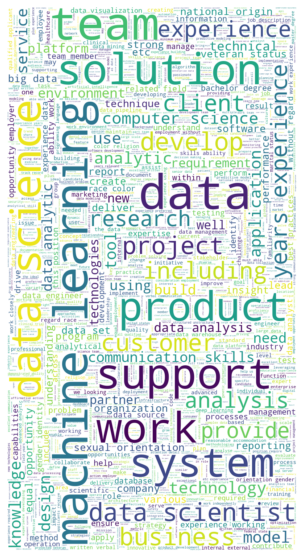

In [66]:

words = " ".join(data['job_description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Model Building

In [67]:
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employee_provided', 'min_salary', 'max_salary',
       'company_text', 'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary'],
      dtype='object')

In [68]:
data.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,spark,sql,power_bi,excel,machine_learning,job_simplified,seniority_level,len_job_description,num_competitors,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,1,1,1,data scientist,na,2536,0,72.0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,1,data scientist,na,4783,0,87.5


In [83]:
relavant_columns = ['rating', 'size',
       'type_of_ownership', 'industry', 'sector', 'revenue',
       'hourly', 'employee_provided',
        'job_state', 'same_state', 'company_age', 'python',
       'tableau', 'aws', 'spark', 'sql', 'power_bi', 'excel',
       'machine_learning', 'job_simplified', 'seniority_level',
       'len_job_description', 'num_competitors', 'avg_salary']

In [84]:
len(relavant_columns)

24

In [85]:
df_model = data[relavant_columns]
df_model = pd.get_dummies(df_model, drop_first = True)
df_model.head()

,rating,hourly,employee_provided,same_state,company_age,python,tableau,aws,spark,sql,...,job_state_ WA,job_state_ WI,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_manager,job_simplified_mle,job_simplified_na,seniority_level_na,seniority_level_senior
0,3.8,0,0,0,47,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.4,0,0,0,36,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.8,0,0,1,10,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,3.8,0,0,1,55,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,2.9,0,0,1,22,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# Model 1

In [155]:
from sklearn.model_selection import train_test_split

x = df_model.drop('avg_salary', axis =1)
y = df_model.avg_salary.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# multiple linear regression 
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [156]:
model = sm.OLS(y_train,x_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     7.187
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           9.28e-59
Time:                        00:35:11   Log-Likelihood:                -2626.9
No. Observations:                 593   AIC:                             5544.
Df Residuals:                     448   BIC:                             6180.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                30.5729     11.504      2.658      0.008       7.965      53.181
rating                                                3.5636      2.339      1.523      0.128      -1.033       8.161
hourly                                              -20.1951     10.730     -1.882      0.060     -41.282       0.892
employee_provided                                    26.0385     14.786      1.761      0.079      -3.020      55.097
same_state                                            1.5470      3.033      0.510      0.610      -4.413       7.507
company_age                                           0.0490      0.035      1.410      0.159      -0.019       0.117
python                                                9.0998      3.035      2.999      0.003       3.136      15.064
tableau                                              -4.3351      3.894     -1.113      0.266     -11.988       3.318
aws                                                   3.4698      3.137      1.106      0.269      -2.695       9.635
spark                                                -5.2664      3.460     -1.522      0.129     -12.065       1.533
sql                                                  -2.8992      3.046     -0.952      0.342      -8.885       3.087
power_bi                                              1.3785      6.476      0.213      0.832     -11.349      14.106
excel                                                 0.8409      2.664      0.316      0.752      -4.394       6.076
machine_learning                                      5.4760      3.217      1.702      0.089      -0.846      11.798
len_job_description                                  -0.0009      0.001     -1.041      0.299      -0.003       0.001
num_competitors                                       2.3850      1.021      2.336      0.020       0.378       4.392
size_1 to 50 employees                                1.8034      8.493      0.212      0.832     -14.888      18.494
size_10000+ employees                               -13.5117      7.889     -1.713      0.087     -29.015       1.992
size_1001 to 5000 employees                           2.6192      5.718      0.458      0.647      -8.618      13.856
size_201 to 500 employees                            -2.1085      5.853     -0.360      0.719     -13.612       9.395
size_5001 to 10000 employees                         -8.7147      7.227     -1.206      0.228     -22.917       5.488
size_501 to 1000 employees                            1.2560      6.143      0.204      0.838     -10.816      13.328
size_51 to 200 employees                              2.0832      6.212      0.335      0.738     -10.126      14.292
size_Unknown   

# Model 2

In [188]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
#lm.fit(x_train, y_train)

np.mean(cross_val_score(lm,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-19.223359099976946

In [189]:
lm_l = Lasso(alpha=1)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-21.97701633769251

In [190]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))

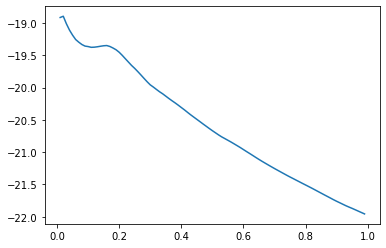

In [191]:
plt.plot(alpha,error)

In [192]:
err = tuple(zip(alpha,error))

In [193]:
err[0:5]

((0.01, -18.91520682224145),
 (0.02, -18.895786892225765),
 (0.03, -19.01188397723271),
 (0.04, -19.110093535592576),
 (0.05, -19.189080500361534))

In [194]:
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
1,0.02,-18.895787


In [196]:
lm_l = Lasso(alpha=0.02)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.10189606105712

In [197]:
prediction = lm_l.predict(x_test)

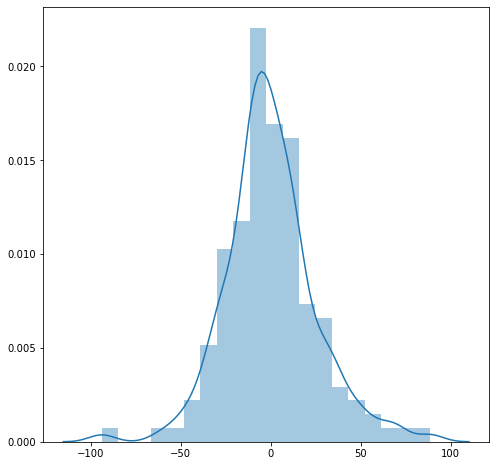

In [198]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

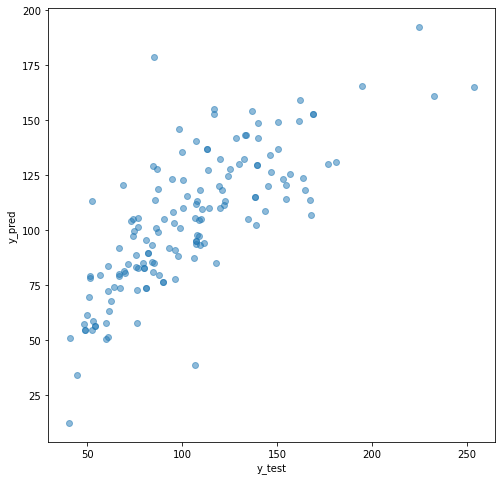

In [199]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [200]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 :', metrics.r2_score(y_test, prediction))

MAE: 18.46456863612541
MSE: 635.7144342395842
RMSE: 25.213378080685345
R^2 : 0.5955767933842149


In [201]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))

-13.367819327731093

In [171]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [173]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [202]:
prediction = rf_random.best_estimator_.predict(x_test)

In [209]:
prediction1 = rf_random.predict(x_test)

In [214]:
rf_random1 = rf_random.best_estimator_

In [215]:
rf_random1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)>

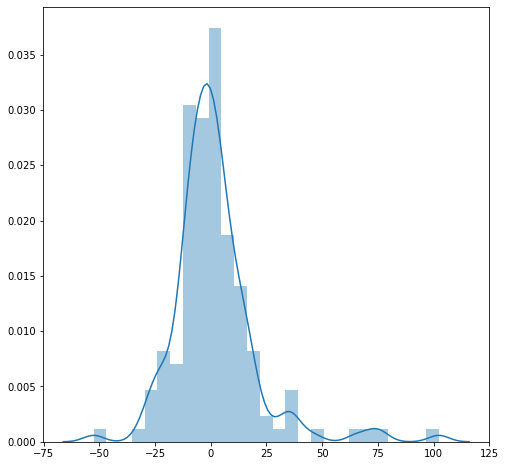

In [211]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction1)
plt.show()

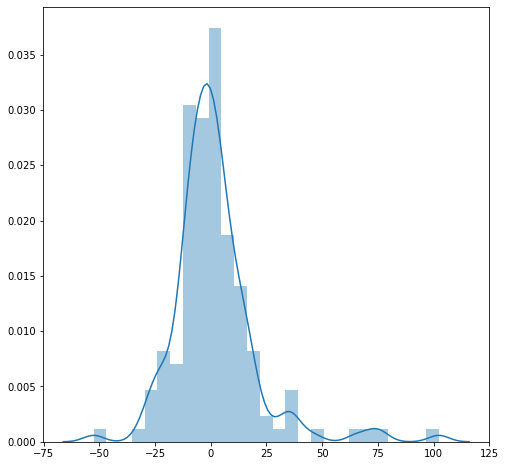

In [203]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

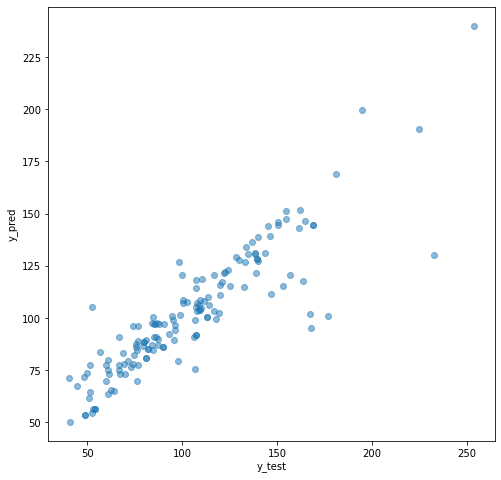

In [204]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [205]:
from sklearn import metrics

In [206]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 :', metrics.r2_score(y_test, prediction))

MAE: 12.200109701014958
MSE: 367.6798268469923
RMSE: 19.174979187654735
R^2 : 0.7660926878917511


In [218]:
rf_random.best_params_

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)>

In [219]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random.best_params_, file)